In [1]:
import numpy as np
from scipy.stats import binom, nbinom

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context='talk', font_scale=1.5, font="Helvetica")

# Why become a follower of Bayes? 

There are many reasons to switch from the tried-and-true frequentist
approaches to make sense of biological data to the Bayesian realm of
the highest density intervals and posterior predictive distributions. In my
view, one of the best reasons is the strange way that the ``intention'' of
the person conducting an experiment can affect the outcome of the
frequentist approach. I first encountered this example in John Kruschke's
fantastic book, [_Doing Bayesian Data Analysis_](https://sites.google.com/site/doingbayesiandataanalysis/).

## A Dataset of $N$ coin tosses 

Consider that you have been given a dataset containing the outcomes of
$N=24$ coin flips, with $k=7$ are heads. Our question is quite simple, ``is the coin fair?''

Framing the question in a way that demands a yes/no answer, is at the very
heart of null hypothesis significant testing that has been the most common
way to analyze experimental results, since it's generally the only way that
statistics is taught scientist. 

To answer this question, we should calculate the dreaded $p$-value. It
seems even the most well-qualified of people disagree about what $p$-value
actually means (For example, see [The American Statistical Association
statement on
P-values](https://www.amstat.org/asa/files/pdfs/p-valuestatement.pdf)). 

The problem in our coin-flips case is quite instructive since it highlights the general
problems when one attempts to calculate $p$-value. 

### What if the experiment was stopped after it reached $N$ data points?

In this scenario, the experimenter simply wanted $N$ data points, and after
she flipped $24$ coins, she stopped. In that case, we can simply use the
binomial distribution:

$$f(k) = \binom{n}{k} p^{k} (1 - p)^{n-k}$$

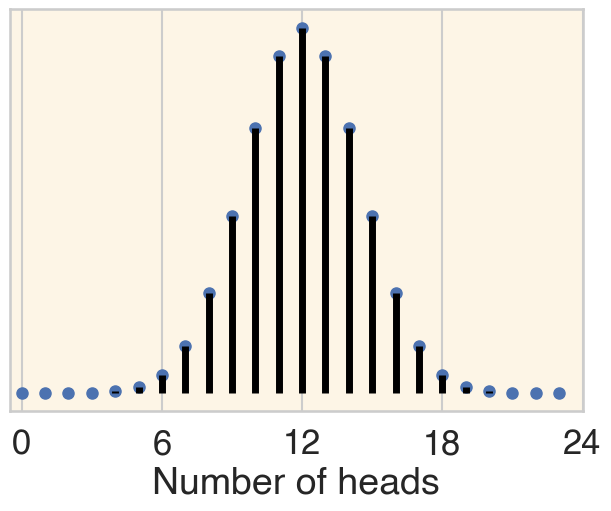

In [2]:
n, p = 24, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6,5),
    constrained_layout=True)

x = np.arange(binom.ppf(0.0, n, p),
              binom.ppf(1, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='black', lw=5, alpha=1)
ax.set_facecolor('oldlace')
ax.set(xlim=(-0.5,24), xticks=np.linspace(0, 24, 5), yticks=[], xlabel='Number of heads');

In order to calculate $p-$value, we have to calculate the probability of getting $k=7$ or more exterme results given $p=0.5$:

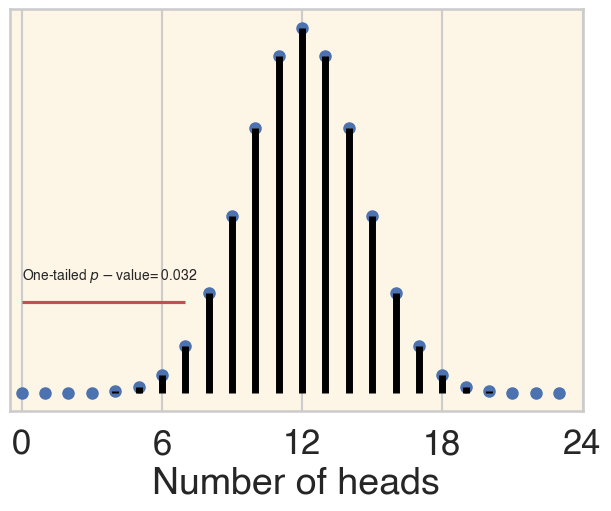

In [3]:
n, p = 24, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6,5),
    constrained_layout=True)

x = np.arange(binom.ppf(0.0, n, p),
              binom.ppf(1, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='black', lw=5, alpha=1)
ax.set_facecolor('oldlace')

ax.hlines(0.04, 0, 7, 'r')
ax.text(0, 0.05, r'One-tailed $p-$value= '+str(np.round(binom.cdf(7, 24, 0.5), decimals=3)), size=10)
ax.set(xlim=(-0.5,24), xticks=np.linspace(0, 24, 5), yticks=[], xlabel='Number of heads');

The threshold $5\%$ for $p-$value corresponds to the two-tailed case. In our one-tailed case, we should compare our $p-$value to $2.5\%$. Since our $p-$value $> 2.5\%$, we cannot reject the null-hypothesis that the coin is fair.

### What if the experiment was stopped after it reached $k$ heads?

The problem is that, if the experiemnt was stopped when we reached $k=7$ heads, then the design of this experiment would be best captured by the negative binomial distribution:

$$f(k) = \binom{n - 1}{k -1} p^{k} (1 - p)^{n-k} \quad ,$$

where the distirbution is counting $n$ trials given $k$ heads.

(_Note:_ the negative binomila distribution can be formulated in many different ways, see [Wikipedia](https://en.wikipedia.org/wiki/Negative_binomial_distribution).)

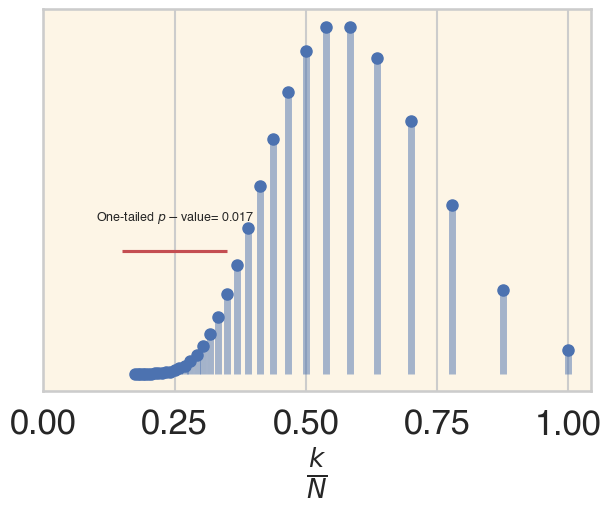

In [4]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6,5),
    constrained_layout=True)

n_draws = np.arange(40, 6, -1)
k, p = 7, 0.5
pmf_vals = np.array([nbinom.pmf(n-k, k, p) for n in n_draws])
ax.plot(7/n_draws, pmf_vals, 'bo', ms=8, label='nbinom pmf')
ax.vlines(7/n_draws, 0, pmf_vals, colors='b', lw=5, alpha=0.5)
ax.set_facecolor('oldlace')

pval = np.sum(pmf_vals[np.where(n_draws>23)])

ax.hlines(0.04, 0.15, 0.35, 'r')
ax.text(0.1, 0.05, r'One-tailed $p-$value= '+str(np.round(pval, decimals=3)), size=9)
ax.set(xticks=np.linspace(0, 1, 5), yticks=[], xlabel=r'$\frac{k}{N}$');

Strangely, with the negative binomial distribution, we can know reject the null hypothesis that the coin is fair!